In [37]:
# related librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, mean_squared_error, roc_curve, accuracy_score,                                classification_report, auc


In [38]:
# set the display option
pd.options.display.max_columns=30

In [39]:
# import the dataset
df = pd.read_csv("assets/UCI_Credit_Card.csv", index_col= 'ID')
# print the dataset
df.head(20)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
6,50000.0,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
7,500000.0,1,1,2,29,0,0,0,0,0,0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
8,100000.0,2,2,2,23,0,-1,-1,0,0,-1,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
9,140000.0,2,3,1,28,0,0,2,0,0,0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0


In [40]:
# shape
df.shape

(30000, 24)

In [41]:
df.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [42]:
col = ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','default.payment.next.month']
for i in df[col]:
    print(df[i].value_counts())
    print()

2    18112
1    11888
Name: SEX, dtype: int64

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
21      67
60      67
61      56
62      44
64      31
63      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
75       3
72       3
71       3
74       1
79       1
Name: AGE, dtype: int64

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        

In [43]:
# describe
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


<AxesSubplot:>

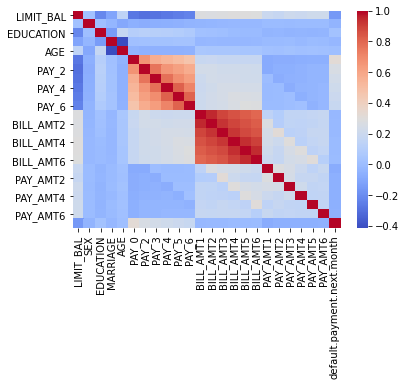

In [44]:
sns.heatmap(df.corr(), cmap='coolwarm')

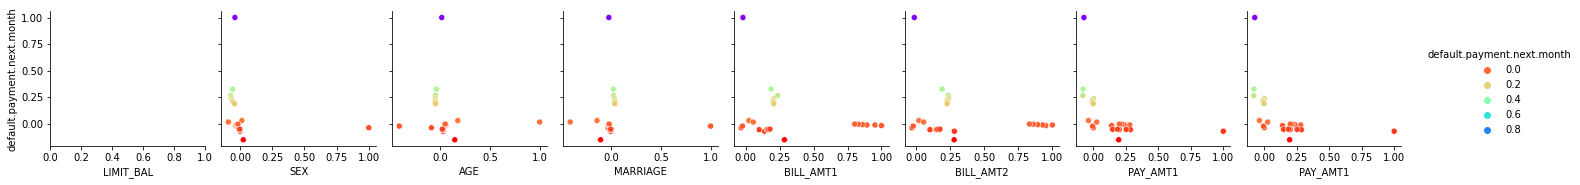

In [45]:
# plot correlation
sns.pairplot(df.corr(), x_vars=['LIMIT_BAL', 'SEX', 'AGE', 'MARRIAGE', 'BILL_AMT1', 'BILL_AMT2', 'PAY_AMT1', 'PAY_AMT1'] , y_vars='default.payment.next.month',hue='default.payment.next.month',palette='rainbow_r')

In [46]:
# target and features
y = df['default.payment.next.month']
X = df.drop('default.payment.next.month', axis=1)

In [47]:
print(X.shape)
print(y.shape)

(30000, 23)
(30000,)


In [48]:
# splitting dataset between train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [49]:
print(f'X_train shape= {X_train.shape}')
print(f'y_train shape= {y_train.shape}')
print(f'X_test shape= {X_test.shape}')
print(f'y_test shape= {y_test.shape}')

X_train shape= (24000, 23)
y_train shape= (24000,)
X_test shape= (6000, 23)
y_test shape= (6000,)


In [50]:
# standardization 
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Classification

In [51]:
def classification(classif, X_train, X_test, y_train, y_test):
    '''
    automate classifications for every method we will use after
    fit, train test scores, predict and confusion matrix
    '''
    # instantiate the model
    model = classif
    # fit the model
    print(f'fitting: {model.fit(X_train, y_train)}')
    print()
    # score of the model
    print(f'Train score = {model.score(X_train, y_train):.3f}')
    print()
    # score of the test set
    print(f'Test score = {model.score(X_test, y_test):.3f}')
    print()
    # y predict
    global y_pred
    y_pred= model.predict(X_test)
    # accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy = {acc:.3f}")
    print()
    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix")
    print('\n')
    print(cm)
    print('\n')
    ### ROC
    print("roc curve")
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    print('\n')
    print(f'False Positive= {fpr} \n True Positive= {tpr} \n Tresholds= {thresholds} \n')
    print('\n')
    print('\n')
    # Ploting ROC curves
    plt.figure(figsize=(8,6))
    plt.title('Receiver Operating Characteristic - ' + str(classif))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.savefig("img/" + str(classif) + ".png")
    plt.show()
    return model, y_pred

In [52]:
def grids(model, prams, X_train, X_test, y_train, y_test, verbose=2):
    '''
    use the gridSearchCv to find the best parameters of the model 
    and return it 
    '''
    
    grid = GridSearchCV(model, param_grid=prams, cv=5, scoring='accuracy')
    # fit
    grid.fit(X_train, y_train)
    # best estimator
    grid.best_estimator_
    # using best estimator for the model
    best_lr = grid.best_estimator_
    return best_lr

In [53]:
def metric(x, y):
    '''
    apply metrics to highlight errors of the choosen model
        confusion_matrix : matrix of good and wrong predictions, 
        mean_squared_error, RMSE : evaluate the error, 
        accuracy_score : mesure the accuracy score, 
        classification_report : showing the main classification metrics,

    with x= true values
         y= predicted values
    '''
    # y_pred
    #classification(classif, X_train, X_test, y_train, y_test)
    #classification(classif, X_train, X_test, y_train, y_test)
    ##

    print("confusion matrix")
    print()
    print(confusion_matrix(x, y))
    print('----------------------------------------------------')
    print("Errors")
    print(f' MSE= {mean_squared_error(x, y):.3f}')
    print(f' RMSE= {np.sqrt(mean_squared_error(x, y)):.3f}')
    print('----------------------------------------------------')
    print(f'Accuracy Score= {accuracy_score(x, y)}')
    print()
    print('----------------------------------------------------')
    print("classification report")
    print()
    print(classification_report(x, y))
    print('----------------------------------------------------')
    
    